In [1]:
# for this notebook make the path in the same folder (currently is in the project folder)
import os
import sys
import importlib

# Add the path to the val03 folder to sys.path so modules in the same folder can be imported
sys.path.append(os.path.join('notebooks', '102 minima varianza'))

In [2]:
from scripts import style
importlib.reload(style)
style.set_style()

In [3]:
# usage_example.py
import importlib
import py102
importlib.reload(py102)

<module 'py102' from 'c:\\Users\\herie\\GitHub\\Proyectos\\En Pausa\\Estimacion de Tendencia\\notebooks\\102 minima varianza\\py102.py'>

c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\102 minima varianza\py102.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== AAPL Elastic Net trend on transform 'log_close' ===
Alpha=0.1000, l1_ratio=0.50
Variance of transformed series: 6.634909e-01
[train    ]  RMSE = 0.207226   RMSE_w = 0.233821
[val      ]  RMSE = 0.286299   RMSE_w = 0.220452
[test     ]  RMSE = 0.110149   RMSE_w = 0.106856
[train_val]  RMSE = 0.229543   RMSE_w = 0.254003


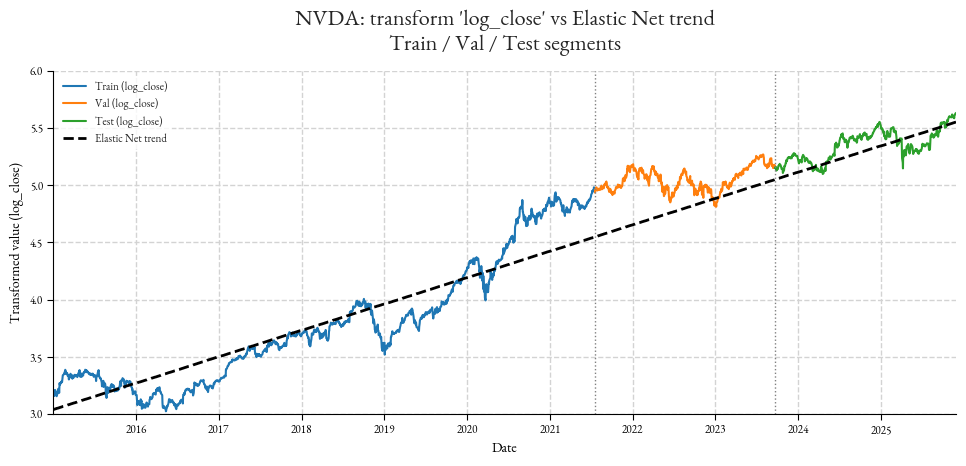

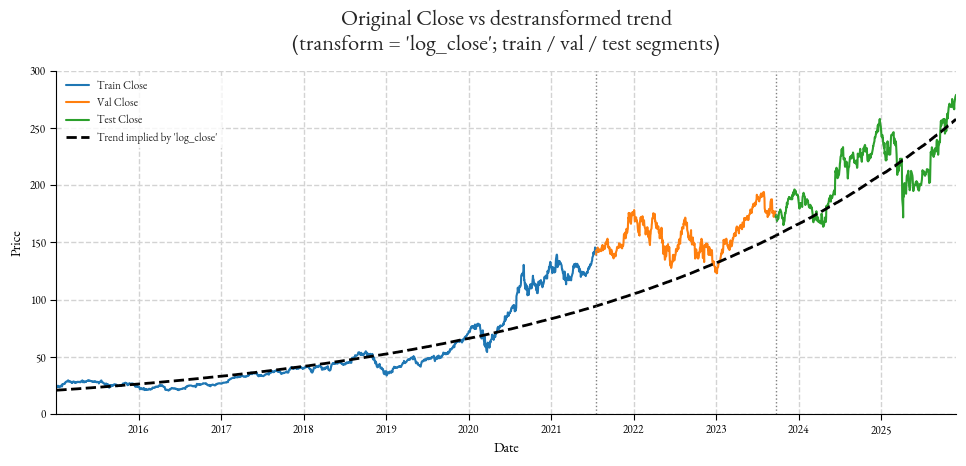

c:\Users\herie\GitHub\Proyectos\En Pausa\Estimacion de Tendencia\notebooks\102 minima varianza\py102.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end, progress=False)



=== AAPL Elastic Net trend on transform 'log_return' ===
Alpha=0.1000, l1_ratio=0.50
Variance of transformed series: 3.316427e-04
[train    ]  RMSE = 0.018552   RMSE_w = 0.020279
[val      ]  RMSE = 0.018349   RMSE_w = 0.018036
[test     ]  RMSE = 0.017009   RMSE_w = 0.018327
[train_val]  RMSE = 0.018502   RMSE_w = 0.019441


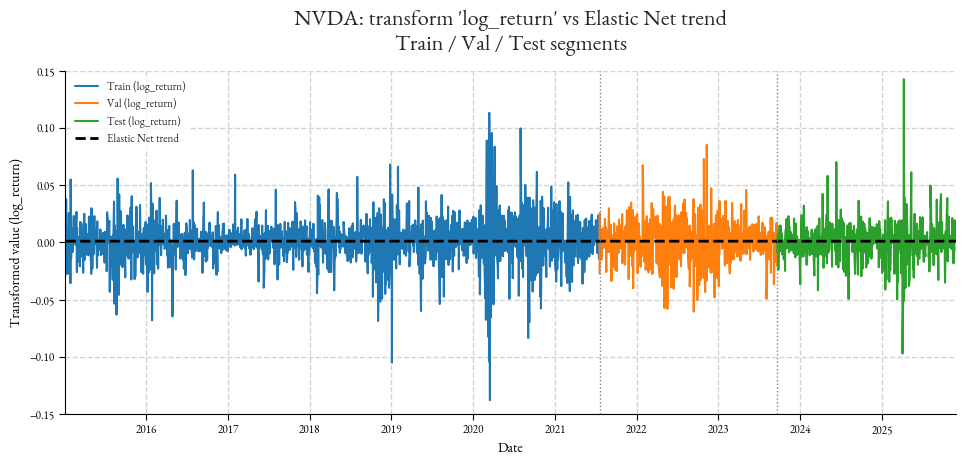

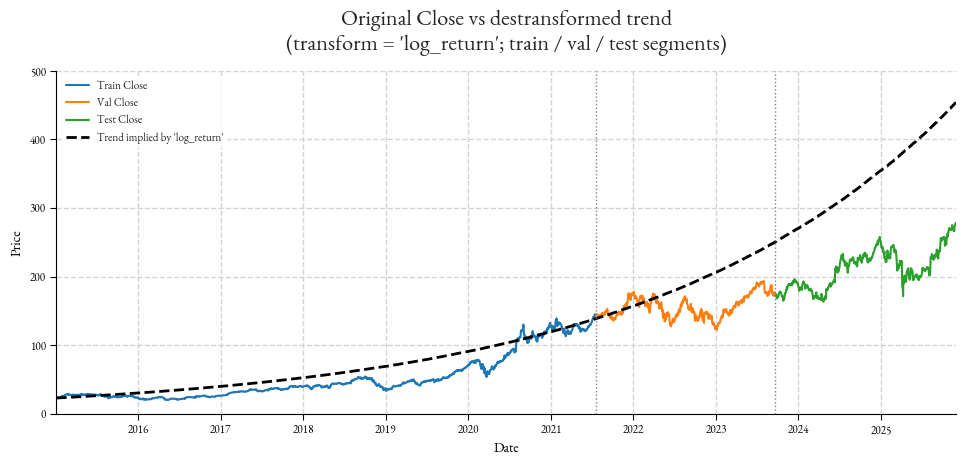

In [5]:
from py102 import (  # or nvda_trend_transforms
    run_transform_experiment,
    plot_transform_trend,
    plot_destransformed_price_trend,
)

# 1) Log prices
log_result, log_model, df_nvda = run_transform_experiment(
    transform_name="log_close",
    ticker="AAPL",
    start="2015-01-01",
    end=None,
    alpha=0.1,
    l1_ratio=0.5,
    random_state=0,
    train_frac=0.6,
    val_frac=0.2,
)

# (a) Trend in transformed space (log)
plot_transform_trend(
    df_nvda,
    log_model,
    transform_name="log_close",
    train_frac=0.6,
    val_frac=0.2,
)

# (b) Same trend mapped back to price space
plot_destransformed_price_trend(
    df_nvda,
    log_model,
    transform_name="log_close",
    train_frac=0.6,
    val_frac=0.2,
)

# 2) Log returns: see how the cumulative-return trend looks in price units
lr_result, lr_model, df_nvda2 = run_transform_experiment(
    transform_name="log_return",
    ticker="AAPL",
    start="2015-01-01",
    end=None,
    alpha=0.1,
    l1_ratio=0.5,
    random_state=0,
    train_frac=0.6,
    val_frac=0.2,
)

# (a) Trend in transformed space (log returns)
plot_transform_trend(
    df_nvda2,
    lr_model,
    transform_name="log_return",
    train_frac=0.6,
    val_frac=0.2,
)

# (b) Implied price path after destransformation
plot_destransformed_price_trend(
    df_nvda2,
    lr_model,
    transform_name="log_return",
    train_frac=0.6,
    val_frac=0.2,
)
